# **Project 2**, APS1070 Fall 2022
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: Oct 27, 9 PM - 13 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Ziruo Song (Zorina)
*   Student Number: 1005637198

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



# **Part 1: Getting started [2 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there?   Ans: 284807 **[0.1]**
* What features in the dataset are present aside from the 28 main features?    Ans: "Time", "Amount", "Class" **[0.1]**
* Which column contains the targets?        Ans: "Class" **[0.1]**
* What is the meaning of target values?      Ans: 1 means "fraudulent transaction", 0 means "non-fraudulent transaction" **[0.1]**

In [1]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [2]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

 10% [.....                                               ]  7127040 / 68750473

 27% [..............                                      ] 19161088 / 68750473

 44% [.......................                             ] 30507008 / 68750473

 54% [............................                        ] 37208064 / 68750473

 66% [..................................                  ] 45432832 / 68750473

 83% [...........................................         ] 57573376 / 68750473

100% [....................................................] 68750473 / 68750473

'creditcard.tar (6).gz'

In [3]:
!tar -zxvf creditcard.tar.gz

x creditcard.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print("There are {} rows.".format(df.shape[0]))
not_feature = df.columns.drop('V'+str(i) for i in range(1,29))
print("Features presented aside from the 28 main features:", 
     not_feature)
print("The values of 'Class' column: ", df.Class.unique())

There are 284807 rows.
Features presented aside from the 28 main features: Index(['Time', 'Amount', 'Class'], dtype='object')
The values of 'Class' column:  [0 1]


It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? **[0.1]**

    Ans: 99.827251% for class0 and 0.172749% for class 1.


* Is this data considered balanced or unbalanced? Why is this the case? **[0.1]**

    Ans: This is unbalanced, since then ratio of the two class indicates the total amount of class 0 is overwhelmingly more than that of class 1.  Considering the scam is an illegal activity, the credit card fraud is not much common in real life, so the class of "non-fraudulent transaction" takes the majority, which is also what we expect to see.
    
    
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1?  **[0.5]**

    Ans: The balanced data is important. As the Class-0 takes the dominant role in the dataset, the model fails to learn about the minotity. So for a higher accuracy, it would tends to always predict class-0 because of large bias.
    
    As the predicticion of KNN is an instance-based simple learning, the lable of an instance in the test set is predicted as the most frenquent label amoung the k training instances nearest itself, so the dominance of the class-0 in the dataset would lead to the situdation that most of the instance in class-1 will be predicted as class-0.
    
    
* What metrics should we use to evaluate a model in such cases **[0.2]**

    Ans: The value could be but not limited to true positive rate(recall), false positive rate(fall-out), accuraccy, precision, F1 score, ROC curve.
    
    


In [7]:
#percent of entries for each class:
df.Class.value_counts()/df.shape[0]*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [8]:
### Split the data  ###
from sklearn.model_selection import train_test_split

X = df[df.columns.drop(not_feature)]
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2/(0.2+0.65), random_state=40)

In [9]:
# check if I did right for the attributions of the train,val,test (similarly, for tagret y)
print(X_train.shape[0]/284807, X_val.shape[0]/284807, X_test.shape[0]/284807)

0.6499945577180336 0.20000210668979343 0.15000333559217294


Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

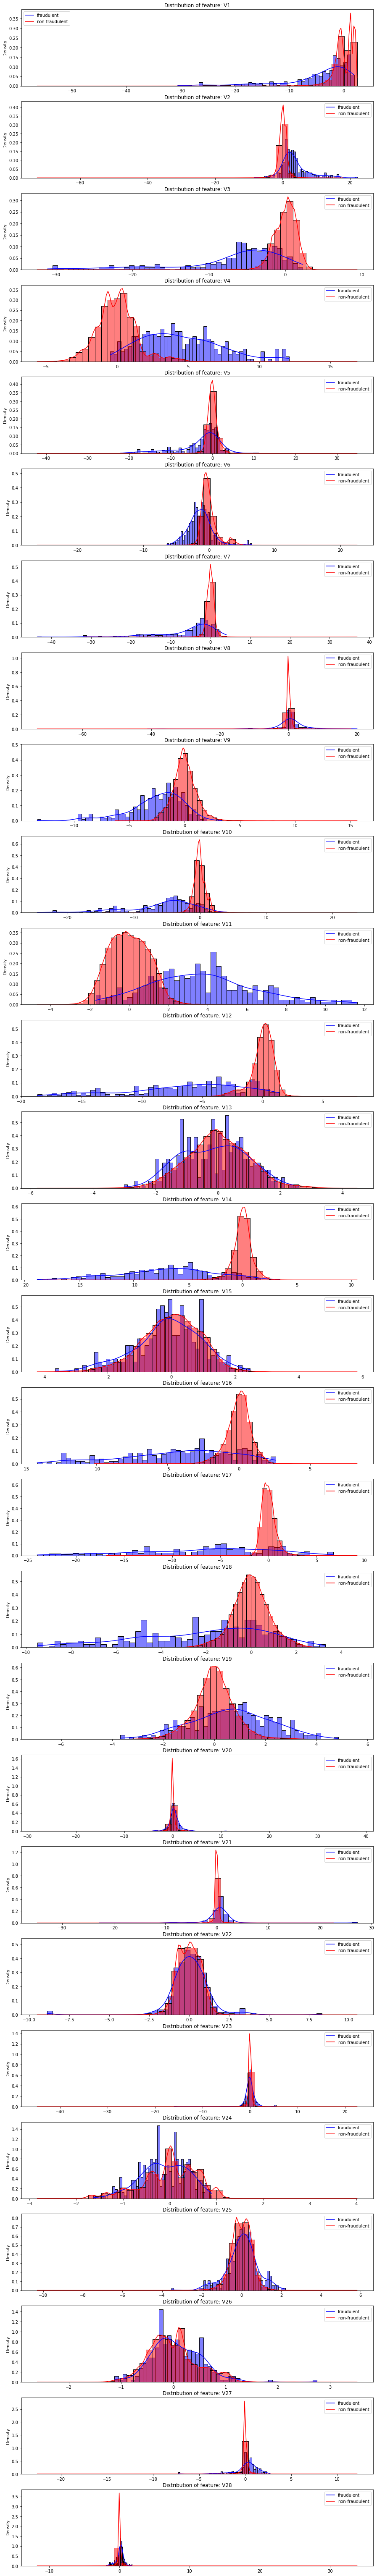

In [10]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**
#These graphs can visualize which features are not much of help in detecting the anamoly. 

The Gaussian distribution is paramererized by mean and variance, and the mean specifies the centre and varaince specifies the width of the distribution. For each fraudelent and non-fraudelent distribution, we could simply assume the normal data are belongs to the dense neiborhood, then detect the anomalies which tend to be sprsely and far away from the centre, or set a threshold for each feature to indentify outliers. In this dataset, the mean value for each feature belongs to non-fradulent class is around 0, so we conclude the dataset is sclaed, and anamolies are tends to appreard with values far from 0. 

At the same time, for each class, we could see how the mean or spread of each feature differs for each other, which provide us a basic understanding of whether the anomolies are the indicators of the fraud. For example, for V3, the mean value for fraudulent class is smaller than non-fraudulent class. The anomolies for non-fraudulent class seems to have smaller values, while the distribution of fraudulent class is left-skewed with most values appear as the anomalies of non-fraudulent class. So we may think a instance with a smaller value of V3 tends to be fraud.

(In addition, these graphs can visualize which features are not much of help in detecting the anamoly, if the distibutions for fraudelent and non-fraudelent class are similar, like feature 15. Then in the futher step, we could consider to drop these features for the predition.)


## **Part 2: One Gaussian model with Single feature: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  7. Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step. 
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.3]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-fraudulent transactions in the training set** in step 1 (instead of all the transactions).
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**
 4. Are these results different or similar? Why?**[0.5]**


#### 2a) Step 1 & 2 & 3: 

In [11]:
# Part 1 & 2 & 3: 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score

auc_t = []
auc_v = []
for feat in features:    #create a loop of Steps 1-3 for each feature
    gm_i = GaussianMixture(n_components = 1, covariance_type = 'full',random_state=0, )
    gm_i.fit(X_train[[feat]])      #Fit a single Gaussian on a single feature of the full training dataset
    
    t = gm_i.score_samples(X_train[[feat]])   
    auc_t.append(roc_auc_score(y_train, 1-t))    #Compute AUC on the full training set of the particular feature
    
    v = gm_i.score_samples(X_val[[feat]])    
    auc_v.append(roc_auc_score(y_val, 1-v))   #Compute AUC on the full validation set

auc = {'Training Set':auc_t,'Validation Set':auc_v}
auc_df = pd.DataFrame(auc,index = ['V'+str(i) for i in range(1,29)])
auc_df.rename_axis('feature',axis = 'rows').rename_axis('AUC',axis = 'columns')

AUC,Training Set,Validation Set
feature,,
V1,0.692540,0.716118
V2,0.848245,0.852456
V3,0.870004,0.856759
V4,0.889715,0.883280
V5,0.761153,0.781160
V6,0.727997,0.721413
V7,0.865497,0.887163
V8,0.774903,0.790317
V9,0.799279,0.794323


#### 2a)  Step 4: Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set.

In [12]:
top_auc = auc_df['Validation Set'].sort_values(ascending = False)[:3]
best_f = top_auc.index.tolist()
print("The best 3 features to distinguish fraudulent transactions are {}.".format(best_f))

The best 3 features to distinguish fraudulent transactions are ['V14', 'V17', 'V10'].


#### 2a) Step 5: Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately.

In [13]:
# first, compute the total number of the entires in Validation set, and how many of them are in class 1(fraud)
print("{} of {} instances are classified as fraud in the validation set.".format(sum(y_val==1),X_val.shape[0]))

102 of 56962 instances are classified as fraud in the validation set.


#### SLOWER Method 1, try all the possible theresholds with steps 0.1 !!!! 
#### Only for comparing the result with the FASTER method below!


In [14]:
from sklearn.metrics import f1_score
thre_list = []
f1_list = []
for feat in best_f:    #best_f = ['V14', 'V17', 'V10']
    gm = GaussianMixture(n_components = 1, covariance_type = 'full',random_state=0, ) 
    gm.fit(X_train[[feat]])
    v = gm.score_samples(X_val[[feat]])         
    f1 = []
    thresholds = np.arange(min(v),max(v), 0.1)   
    for t in thresholds:
        scores = f1_score(y_val, v<t)
        f1.append(scores)
    max_id = np.argmax(f1)
    thre_list.append(thresholds[max_id])
    f1_list.append(f1[max_id])

temp = {'Best Threshold':thre_list,'Highest F1':f1_list}
thre_with_f1 = pd.DataFrame(temp, index = ['V14', 'V17', 'V10'])
thre_with_f1

,Best Threshold,Highest F1
V14,-19.397872,0.619289
V17,-22.034149,0.597701
V10,-27.820401,0.212963


###  FASTER method ! Take this way.

In [15]:
# Method 2:  FASTER ! Take this way!!!
from sklearn.metrics import f1_score
thre_list = []
f1_list = []
for feat in best_f:
    gm = GaussianMixture(n_components = 1, covariance_type = 'full',random_state=0, ) 
    gm.fit(X_train[[feat]])
    v = gm.score_samples(X_val[[feat]])
    f1 = []
    # Only 102 of 56962 are classifed as fraud, so checking only the smaller values of v is fine, for saving time.
    # Sort v, travel the first 500 with steps=5
    # take the best one, showing below, with only slight differences of f1 if travel all the possible thresholds
    random=np.arange(1,500, 5)
    for i in random: 
        tr = sorted(v)[i]
        scores = f1_score(y_val, v<tr)
        f1.append(scores)
    idx = np.argmax(f1)
    thre_list.append(sorted(v)[random[idx]])
    f1_list.append(max(f1))

temp = {'Best Threshold':thre_list,'Highest F1':f1_list}
thre_with_f1 = pd.DataFrame(temp, index = ['V14', 'V17', 'V10'])
thre_with_f1

,Best Threshold,Highest F1
V14,-19.178915,0.616162
V17,-18.265265,0.590674
V10,-27.547551,0.211009


#### 2a) Step 6: Report Precision, Recall and F1 score on both training and validation set in a table 



In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score
train_result=[]
val_result=[]
for feat in best_f:   
    gm = GaussianMixture(n_components = 1, covariance_type = 'full',random_state=0, ) 
    gm.fit(X_train[[feat]])
    t = gm.score_samples(X_train[[feat]])
    v = gm.score_samples(X_val[[feat]])
    
    #get the corresponding threshold for each feature from table above
    best_tr = thre_with_f1.loc[feat,'Best Threshold']
    #store the results as a list for each feature, and append it to the corresonding train/validation results set
    train_result.append([precision_score(y_train, t<best_tr),
                         recall_score(y_train, t<best_tr),f1_score(y_train, t<best_tr)])   #on training set
    val_result.append([precision_score(y_val, v<best_tr),
                       recall_score(y_val, v<best_tr),f1_score(y_val, v<best_tr)])   #on validation set
    
combine=[]
for i in range(0,3):
    combine.append(train_result[i])
    combine.append(val_result[i])    #get the results on training set followed by validation set, for each feature
index_array = [np.array(['V14','V14','V17','V17','V10','V10']),
               np.array(["training","validation","training","validation","training","validation"])]
compare = pd.DataFrame(combine,index=index_array,columns=["precision", "recall", "f1"])

compare.insert(0,'AUC', auc_df.loc[best_f,:].stack().values.tolist())
compare

AUC  precision    recall        f1
V14 training    0.948014   0.606557  0.574534  0.590112
    validation  0.955065   0.635417  0.598039  0.616162
V17 training    0.928937   0.591973  0.549689  0.570048
    validation  0.925698   0.626374  0.558824  0.590674
V10 training    0.910025   0.181384  0.236025  0.205128
    validation  0.917279   0.198276  0.225490  0.211009

#### 2a) Step 7: Report the complexity of your method (Big O notation) for determining the optimal threshold.

For EACH feature: 

First, sort() in python, 'sorted(v)': O(nlogn)

Take a value from sorted 'v' to get the threshold 'tr': O(n), as binary search is used

Find the index of the maximum,'np.argmax(f1)': O(n), as it takes one pass through the entir array, and makes n comparisons.

Use the index to locate the optimum threshold in the sorted array, : O(n)

Used a loop for an entire array, 'for i in random:': O(n)

### b. Fitting based on class:
Pick 3 features that had the best AUC in Part 2a.

repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian only on non-fraudulent transactions in the training set in step 1 (instead of all the transactions).

Compare your results from parts 2a and 2b in a table (for both training and validation set). [0.2]

Are these results different or similar? Why?[0.5]

In [17]:
# find a optimal threshold for each feature based on the highest f1 on validation set
thre_list2 = []
f1_list2 = []
for feat in best_f:
    gm = GaussianMixture(n_components = 1, covariance_type = 'full',random_state=0, ) 
    gm.fit(X_train[y_train==0][[feat]])    #fit a Gaussian based on the non-fraudulent training set only
    v = gm.score_samples(X_val[[feat]])     #score_samples with unfiltered validation set
    f1 = []
    # Only 102 of 56962 are classifed as fraud, so checking only the smaller values of v is fine, for saving time.
    # Sort v, travel the first 1000 with steps=10,first 500 with steps=5, and first 200 with steps=2,
    # take the best one, showing below, with only slight differences of f1 if travel all the possible thresholds
    random=np.arange(1,200, 2)
    for i in random: 
        tr = sorted(v)[i]
        scores = f1_score(y_val, v<tr)
        f1.append(scores)
    idx = np.argmax(f1)
    thre_list2.append(sorted(v)[random[idx]])
    f1_list2.append(max(f1))

temp2 = {'Best Threshold':thre_list2,'Highest F1':f1_list2}
thre_with_f1_filtered = pd.DataFrame(temp2, index = ['V14', 'V17', 'V10'])
thre_with_f1_filtered

,Best Threshold,Highest F1
V14,-21.847508,0.619289
V17,-23.046362,0.596859
V10,-29.957481,0.211982


In [18]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score, recall_score, f1_score
train_result_filtered=[]
val_result_filtered=[]

for feat in best_f:   
    gm = GaussianMixture(n_components = 1, covariance_type = 'full',random_state=0, ) 
    gm.fit(X_train[y_train==0][[feat]])   #fit a Gaussian based on the non-fraudulent training set only
    
    t = gm.score_samples(X_train[[feat]])
    v = gm.score_samples(X_val[[feat]])
    
    #get the corresponding threshold for each feature from table above
    best_tr = thre_with_f1_filtered.loc[feat,'Best Threshold']
    #store the results as a list for each feature, and append it to the corresonding train/validation results set
    train_result_filtered.append([roc_auc_score(y_train, 1-t),precision_score(y_train, t<best_tr),
                         recall_score(y_train, t<best_tr),f1_score(y_train, t<best_tr)])   #on training set
    val_result_filtered.append([roc_auc_score(y_val, 1-v), precision_score(y_val, v<best_tr),
                       recall_score(y_val, v<best_tr),f1_score(y_val, v<best_tr)])   #on validation set

combine_filtered=[]
for i in range(0,3):
    combine_filtered.append(train_result_filtered[i])
    combine_filtered.append(val_result_filtered[i])    #get the results on training set followed by validation set, for each feature
index_array = [np.array(['V14','V14','V17','V17','V10','V10']),
               np.array(["training","validation","training","validation","training","validation"])]
compare_filtered = pd.DataFrame(combine_filtered,index=index_array,columns=["AUC","precision", "recall", "f1"])
compare_filtered

AUC  precision    recall        f1
V14 training    0.948317   0.622896  0.574534  0.597738
    validation  0.954915   0.642105  0.598039  0.619289
V17 training    0.928398   0.592593  0.546584  0.568659
    validation  0.925267   0.640449  0.558824  0.596859
V10 training    0.910169   0.184019  0.236025  0.206803
    validation  0.917267   0.200000  0.225490  0.211982

In [19]:
compare.join(compare_filtered,lsuffix = '_unfiltered',rsuffix='_filtered')   #join the two results for comparison

AUC_unfiltered  precision_unfiltered  recall_unfiltered  \
V14 training          0.948014              0.606557           0.574534   
    validation        0.955065              0.635417           0.598039   
V17 training          0.928937              0.591973           0.549689   
    validation        0.925698              0.626374           0.558824   
V10 training          0.910025              0.181384           0.236025   
    validation        0.917279              0.198276           0.225490   

                f1_unfiltered  AUC_filtered  precision_filtered  \
V14 training         0.590112      0.948317            0.622896   
    validation       0.616162      0.954915            0.642105   
V17 training         0.570048      0.928398            0.592593   
    validation       0.590674      0.925267            0.640449   
V10 training         0.205128      0.910169            0.184019   
    validation       0.211009      0.917267            0.200000   

                recall_filtered  f1_filtered  
V14 training           0.574534     0.597738  
    validation         0.598039     0.619289  
V17 training           0.546584     0.568659  
    validation         0.558824     0.596859  
V10 training           0.236025     0.206803  
    validation         0.225490     0.211982

#### 2b) Step 4: Are these results different or similar? Why?
They are similar, because this is an unbalanced dataset, and most of the data, about 99.827251%, are classifies as non-fraudulent. So if we only fitted by non-fraudulent data, the results are presented similar, especially the F1 score, which is the trade-off between precision and recall.

## **Part 3: One Gaussian model with multiple features: [2 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot color the training set based on their class (non-fraudulents blue and fraudulents red). **[0.25]**
 4. Based on your plots decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). **[0.25]**
 5. Fit your Gaussian model on the training set (all samples). 
 6. Compute AUC on both training and validation sets **[0.25]**
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried.)
 9. Find a threshold to maximize your F1 Score on the validation set.**[0.25]**
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**




#### 3)  Step 1, 2, 3 : Pick V9 and V16 randomly; make scatter plot;  different classes in different colors.

Text(0.5, 1.0, 'V9 and V16 in training set')

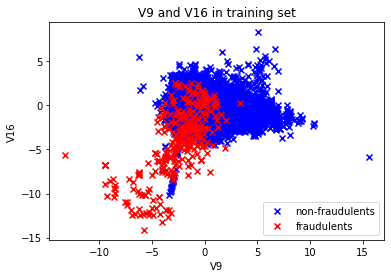

In [20]:
#pick two features: f1 = V9 and f2 = V16
import matplotlib.pyplot as plt

pick_1st = ['V9','V16']
plt.scatter(X_train['V9'][y_train==0],X_train['V16'][y_train==0],color='blue',label='non-fraudulents',marker="x")
plt.scatter(X_train['V9'][y_train==1],X_train['V16'][y_train==1],color='red',label = 'fraudulents',marker="x")
plt.xlabel('V9')
plt.ylabel('V16')
plt.legend()
plt.title("V9 and V16 in training set")

#### 3) Step 4, 5, 6: Decide numbers of components; fit a gussian; get AUC for both training and validation set.



In [21]:
from sklearn.metrics import roc_auc_score

#as we focus on valid transactions, so let's take 1 Gaussian components.
gm_9_16 = GaussianMixture(n_components = 1, covariance_type = 'full',random_state=0, )

#Fit your Gaussian model on the training set (all samples of the two features).
gm_9_16.fit(X_train[['V9','V16']])

# Compute AUC on both training and validation sets 
t_9_16 = gm_9_16.score_samples(X_train[['V9','V16']])
auc_t_9_16= roc_auc_score(y_train, 1-t)
print('AUC on training set:',auc_t_9_16)

v_9_16 = gm_9_16.score_samples(X_val[['V9','V16']])
auc_v_9_16= roc_auc_score(y_val, 1-v)
print('AUC on validation set:',auc_v_9_16)


AUC on training set: 0.9101690752728779
AUC on validation set: 0.9172668680556992


#### 3) Step 7: Randomly pick other three features: V19 and V24;  V18 and V12 ;    V7 and V11.
####         Repeat above steps.



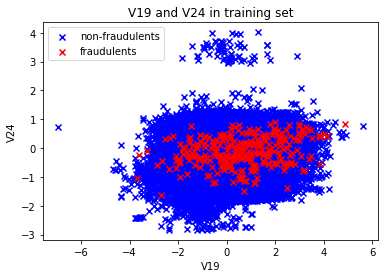

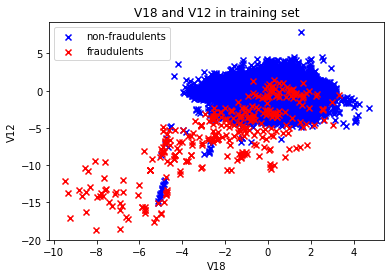

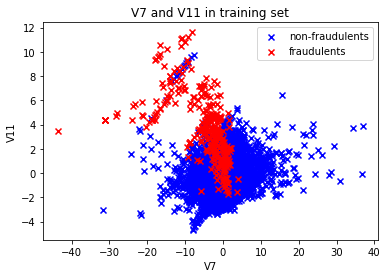

In [22]:
pick_others = [['V19','V24'],['V18','V12'],['V7','V11']]

for pair in pick_others:   # 3 scatter plots
    plt.figure()
    plt.scatter(X_train[pair[0]][y_train==0],X_train[pair[1]][y_train==0],color='blue',label='non-fraudulents',marker="x")
    plt.scatter(X_train[pair[0]][y_train==1],X_train[pair[1]][y_train==1],color='red',label='fraudulents',marker="x")
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.legend()
    plt.title('{} and {} in training set'.format(pair[0],pair[1]))
    plt.show()

In [23]:
from sklearn.metrics import roc_auc_score

gm_19_24 = GaussianMixture(n_components = 2, covariance_type = 'full',random_state=0, )
gm_18_12 = GaussianMixture(n_components = 1, covariance_type = 'full',random_state=0, )
gm_7_11 = GaussianMixture(n_components = 1, covariance_type = 'full',random_state=0, )
gm_list = [gm_19_24,gm_18_12,gm_7_11]

print('The AUC for the other pairs are:\n')
for pair, gm in zip(pick_others,gm_list) :
    gm.fit(X_train[pair])   #fit on all the training set (of the two features)
    
    t = gm.score_samples(X_train[pair])         
    auc_t = roc_auc_score(y_train, 1-t)
    print('AUC on training set:',auc_t)
    
    v = gm.score_samples(X_val[pair])         
    auc_v = roc_auc_score(y_val, 1-v)
    print('AUC on validation set :',auc_v,'\n')

The AUC for the other pairs are:

AUC on training set: 0.7198493958298806
AUC on validation set : 0.6976317822239695 

AUC on training set: 0.9236997117698638
AUC on validation set : 0.907710199802749 

AUC on training set: 0.9118714436522806
AUC on validation set : 0.9098458201430414 



#### 3) Step 8: As the the AUC on the validation set when f1=V7 and f1=V11 is slightly higher,pick V7 and V11. (The last pair)
#### 3) Step 9: Find a threshold to maximize  F1 Score on the validation set.

In [24]:
v_7_11 = gm_7_11.score_samples(X_val[['V7','V11']])

f1_7_11=[]
random = np.arange(1, 200, 5)    # 56962 samples in validation data, and only 102 of them are fraud.
for i in random: 
    tr = sorted(v_7_11)[i] #We sort the points by probability, based on data itself(log-likelihood)
    scores = f1_score(y_val, v_7_11 < tr)
    f1_7_11.append(scores)
idx_7_11 = np.argmax(f1_7_11)
tr_7_11 = sorted(v_7_11)[random[idx_7_11]]

print("The best threshold:", tr_7_11)
print("The corresponding highest f1:", max(f1_7_11))

The best threshold: -70.73582407856095
The corresponding highest f1: 0.28758169934640526


#### 3) Step 10: Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold 

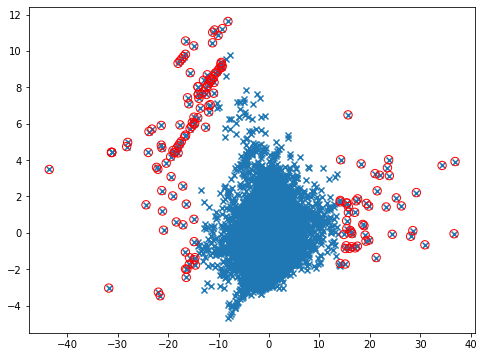

In [25]:
# On training set
plt.figure(figsize=(8,6))
pts_t= X_train[['V7','V11']].to_numpy()
c = gm_7_11.score_samples(X_train[['V7','V11']])
plt.scatter(X_train['V7'],X_train['V11'],cmap='viridis',marker="x")
# Circling of anomalies
outliers_t = np.nonzero(c < tr_7_11)[0]
plt.scatter(pts_t[outliers_t,0],pts_t[outliers_t,1],marker="o",facecolor= "none",edgecolor="r",s=70)
plt.show()

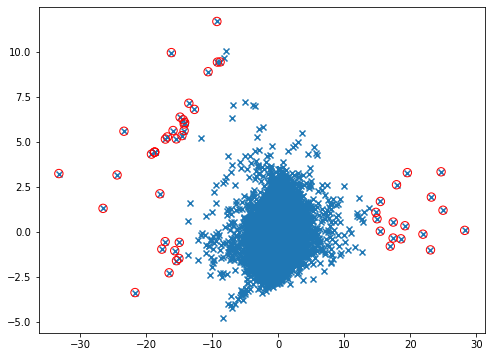

In [26]:
# On validation set
plt.figure(figsize=(8,6))
pts_v= X_val[['V7','V11']].to_numpy()
m = gm_7_11.score_samples(X_val[['V7','V11']])
plt.scatter(X_val['V7'],X_val['V11'],cmap='viridis',marker="x")
# Circling of anomalies
outliers_v = np.nonzero(m < tr_7_11 )[0]
plt.scatter(pts_v[outliers_v,0],pts_v[outliers_v,1],marker="o",facecolor= "none",edgecolor="r",s=70)
plt.show()

## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**
  6. Can we report AUC for this model? Why? **[0.5]**

#### 4) Step 1-4 : Use V1 as an example.

In [27]:
G1 = GaussianMixture(n_components = 1, covariance_type = 'full',random_state=0, )
G1.fit(X_train[y_train==0][['V1']])    #step1

G2= GaussianMixture(n_components = 1, covariance_type = 'full',random_state=0, )
G2.fit(X_train[y_train==1][['V1']])   #step2

S1=G1.score_samples(X_val[['V1']])
S2=G2.score_samples(X_val[['V1']])    #step3

C = np.arange(0,10.1,0.1)        #step 4, if use 10 instead 10.1 here, then 10 is not included
f1_c = []
for c in C:
    scores = f1_score(y_val, S1< c * S2)
    f1_c.append(scores)
idx = np.argmax(f1_c)
c_best = C[idx]
f1_byc = max(f1_c)
print("The optimal c for V1 is {}, with the highst F1 Score of {}.".format(c_best,f1_byc))

The optimal c for V1 is 6.6000000000000005, with the highst F1 Score of 0.1523809523809524.


####  4) Step 5: Repeat for each feature.

In [28]:
c_best=[]
f1_byc=[]
for feat in features:
    G1 = GaussianMixture(n_components = 1, covariance_type = 'full',random_state=0, )
    G1.fit(X_train[y_train==0][[feat]])
    G2= GaussianMixture(n_components = 1, covariance_type = 'full',random_state=0, )
    G2.fit(X_train[y_train==1][[feat]])
    S1=G1.score_samples(X_val[[feat]])
    S2=G2.score_samples(X_val[[feat]])
    
    C = np.arange(0,10.1,0.1) 
    f1_c = []
    for c in C:
        scores = f1_score(y_val, S1< c * S2)
        f1_c.append(scores)
    idx = np.argmax(f1_c)
    c_best.append(C[idx])
    f1_byc.append(max(f1_c))
c_with_f1 = pd.DataFrame({'optimal c':c_best,'highest F1':f1_byc},index=features)
c_with_f1

,optimal c,highest F1
V1,6.6,0.152381
V2,5.9,0.175439
V3,7.6,0.312139
V4,4.2,0.377358
V5,8.3,0.193939
V6,1.9,0.118812
V7,10.0,0.237113
V8,6.9,0.104167
V9,3.4,0.448980
V10,6.8,0.397590


In [29]:
# Compute the best F1 Score, Precision and Recall for training and validation. Which feature and what c?
train_c=[]
val_c=[]
for feat in features:
    G1 = GaussianMixture(n_components = 1, covariance_type = 'full',random_state=0, )
    G1.fit(X_train[y_train==0][[feat]])
    
    G2= GaussianMixture(n_components = 1, covariance_type = 'full',random_state=0, )
    G2.fit(X_train[y_train==1][[feat]])
    
    T1=G1.score_samples(X_train[[feat]])
    T2=G2.score_samples(X_train[[feat]])
    
    S1=G1.score_samples(X_val[[feat]])
    S2=G2.score_samples(X_val[[feat]])
    
    c = c_with_f1.loc[feat,'optimal c']
    train_c.append([precision_score(y_train, T1< c * T2),
                         recall_score(y_train, T1< c * T2),f1_score(y_train, T1< c * T2)])   #on training set
    val_c.append([precision_score(y_val, S1< c * S2),
                       recall_score(y_val, S1< c * S2),f1_score(y_val, S1< c * S2)])   #on validation set
    
result_c=[]
for i in range(0,28):
    result_c.append(train_c[i])
    result_c.append(val_c[i])
    
iterables = [features, ["training", "validation"]]
multi_idx = pd.MultiIndex.from_product(iterables, names=["features", "set"])  #compute multi-level index
socres_df = pd.DataFrame(result_c, index=multi_idx, columns= ["F1 Score", "Precision", "Recall"])
socres_df

F1 Score  Precision    Recall
features set                                      
V1       training    0.126506   0.130435  0.128440
         validation  0.148148   0.156863  0.152381
V2       training    0.605263   0.071429  0.127778
         validation  0.833333   0.098039  0.175439
V3       training    0.351759   0.217391  0.268714
         validation  0.380282   0.264706  0.312139
V4       training    0.346041   0.366460  0.355958
         validation  0.363636   0.392157  0.377358
V5       training    0.223404   0.130435  0.164706
         validation  0.253968   0.156863  0.193939
V6       training    0.067164   0.195652  0.100000
         validation  0.079470   0.235294  0.118812
V7       training    0.267399   0.226708  0.245378
         validation  0.250000   0.225490  0.237113
V8       training    0.048387   0.093168  0.063694
         validation  0.080645   0.147059  0.104167
V9       training    0.743802   0.279503  0.406321
         validation  0.733333   0.323529  0.448980
V10      training    0.443089   0.338509  0.383803
         validation  0.515625   0.323529  0.397590
V11      training    0.662745   0.524845  0.585789
         validation  0.771429   0.529412  0.627907
V12      training    0.753846   0.608696  0.673540
         validation  0.794521   0.568627  0.662857
V13      training    0.002819   0.201863  0.005560
         validation  0.002574   0.176471  0.005075
V14      training    0.595376   0.639752  0.616766
         validation  0.653846   0.666667  0.660194
V15      training    0.003842   0.071429  0.007291
         validation  0.003955   0.068627  0.007479
V16      training    0.770053   0.447205  0.565815
         validation  0.746032   0.460784  0.569697
V17      training    0.636656   0.614907  0.625592
         validation  0.719101   0.627451  0.670157
V18      training    0.753968   0.295031  0.424107
         validation  0.885714   0.303922  0.452555
V19      training    0.059908   0.040373  0.048237
         validation  0.082192   0.058824  0.068571
V20      training    0.008136   0.133540  0.015338
         validation  0.013522   0.215686  0.025448
V21      training    0.023110   0.251553  0.042331
         validation  0.029301   0.303922  0.053448
V22      training    0.173913   0.012422  0.023188
         validation  0.333333   0.029412  0.054054
V23      training    0.013223   0.024845  0.017260
         validation  0.022599   0.039216  0.028674
V24      training    0.001951   0.034161  0.003692
         validation  0.003448   0.058824  0.006515
V25      training    0.011076   0.043478  0.017654
         validation  0.018135   0.068627  0.028689
V26      training    0.002583   0.208075  0.005102
         validation  0.002610   0.205882  0.005155
V27      training    0.030394   0.282609  0.054885
         validation  0.030405   0.264706  0.054545
V28      training    0.014824   0.263975  0.028071
         validation  0.017212   0.294118  0.032520

#### 4) Step6: Can we report AUC for this model? Why?
AUC means area under the ROC Curve which indicates how model performance at different threshold values, so we could say AUC aggregates the performance of the model at all threshold values. As we did not use any threshold in this model, so the AUC cannot be reported here.

## **Part 5: Multivariate and Mixture of Gaussians Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) .
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[3]**


**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid transaction and multiple components for fraudulent ones! Why does it make sense to have multiple components for the fraudulent transactions?


###### From the distributions of each feature generated at the begining, it's clear that many of the fraudulent transaction are more spread out, as the distribution for valid transactions look normal, like V4, V12, V16, V18, So increasing the numbers of components for fraudulent transactions may be considered.

## model
#### Based on Part2, we have found the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set are  V14, V17, V10. So I  considere:
#### One gaussian model, difference numbers of component(s), multiple features with V14, V17, V10.

In [34]:
#Recall best_f =['V14','V17','V10'] was defined.
from sklearn.metrics import roc_auc_score
def Choose_n_components(n):
    gm = GaussianMixture(n_components = n, covariance_type = 'full',random_state=0, )
    gm.fit(X_train[best_f])

    t = gm.score_samples(X_train[best_f])
    auc_t = roc_auc_score(y_train, 1-t)   #auc on training set

    v = gm.score_samples(X_val[best_f])
    auc_v = roc_auc_score(y_val, 1-v)   #auc on validation set

    f1=[]
    # find treshold that maximize f1
    random = np.arange(1, 500, 2)    # 56962 samples in validation data, and only 102 of them are fraud.
    for i in random: 
        tr = sorted(v)[i] #We sort the points by probability, based on data itself(log-likelihood)
        scores = f1_score(y_val, v < tr)
        f1.append(scores)
    idx = np.argmax(f1)
    tr = sorted(v)[random[idx]]

    # compute best f1, Precision and Recall (after tuning the threshold) for both training and validation sets  
    train_result=[auc_t,f1_score(y_train, t<tr),precision_score(y_train, t<tr),recall_score(y_train, t<tr)]
    val_result=[auc_v, f1_score(y_val, v<tr),precision_score(y_val, v<tr),recall_score(y_val, v<tr)]
    combine =[train_result,val_result]
    result = pd.DataFrame(combine,index=['train', 'validation'],columns=['AUC','best-F1', 'Precision', 'Recall'])
    return result

for n in [1,3,5]:
    print("Choose {} with n={}\n".format(best_f,n), Choose_n_components(n),'\n')

Choose ['V14', 'V17', 'V10'] with n=1
                  AUC   best-F1  Precision    Recall
train       0.957583  0.534965   0.612000  0.475155
validation  0.964923  0.598870   0.706667  0.519608 

Choose ['V14', 'V17', 'V10'] with n=3
                  AUC   best-F1  Precision    Recall
train       0.956819  0.473214   0.454286  0.493789
validation  0.963630  0.477612   0.484848  0.470588 

Choose ['V14', 'V17', 'V10'] with n=5
                  AUC   best-F1  Precision   Recall
train       0.955140  0.485714   0.449735  0.52795
validation  0.961164  0.516129   0.486957  0.54902 



Best-F1 is decreasing with flucatuations as n inreases, so choose n=1, in the one Gaussion model with features V14, V17, V10, which has Best-F1 of 0.598870.

## model
#### As there are also many features which have quite unsimilar distributions for different classes, like V4,V12,V16,V18 by observing the distribution graph made before. So I decide to add them into the features with above V14, V17,V10.  
#### So the model below are: One gaussian model, try multiple numbers of component, using features  V14, V17, V10 and V4, V12, V16, V18.

In [36]:
mypick = best_f+['V4','V12','V16','V18']   #get the list of V14, V17, V10, V4, V12, V16, V18
def Choose_n_components2(n):
    gm = GaussianMixture(n_components = n, covariance_type = 'full',random_state=0, )
    gm.fit(X_train[mypick])

    t = gm.score_samples(X_train[mypick])
    auc_t = roc_auc_score(y_train, 1-t)   #auc on training set

    v = gm.score_samples(X_val[mypick])
    auc_v = roc_auc_score(y_val, 1-v)   #auc on validation set

    f1=[]
    # find treshold that maximize f1
    random = np.arange(1, 500, 2)    # 56962 samples in validation data, and only 102 of them are fraud.
    for i in random: 
        tr = sorted(v)[i] #We sort the points by probability, based on data itself(log-likelihood)
        scores = f1_score(y_val, v < tr)
        f1.append(scores)
    idx = np.argmax(f1)
    tr = sorted(v)[random[idx]]

    # compute best f1, Precision and Recall (after tuning the threshold) for both training and validation sets  
    train_result=[auc_t,f1_score(y_train, t<tr),precision_score(y_train, t<tr),recall_score(y_train, t<tr)]
    val_result=[auc_v, f1_score(y_val, v<tr),precision_score(y_val, v<tr),recall_score(y_val, v<tr)]
    combine =[train_result,val_result]
    result = pd.DataFrame(combine,index=['train', 'validation'],columns=['AUC','best-F1', 'Precision', 'Recall'])
    return result

for n in [1,3,5]:
    print("Choose {} with n={}\n".format(mypick,n), Choose_n_components2(n),'\n')

Choose ['V14', 'V17', 'V10', 'V4', 'V12', 'V16', 'V18'] with n=1
                  AUC   best-F1  Precision    Recall
train       0.954581  0.621974   0.776744  0.518634
validation  0.958581  0.642424   0.841270  0.519608 

Choose ['V14', 'V17', 'V10', 'V4', 'V12', 'V16', 'V18'] with n=3
                  AUC   best-F1  Precision    Recall
train       0.956006  0.476868   0.558333  0.416149
validation  0.969280  0.502994   0.646154  0.411765 

Choose ['V14', 'V17', 'V10', 'V4', 'V12', 'V16', 'V18'] with n=5
                  AUC   best-F1  Precision    Recall
train       0.956833  0.401408   0.463415  0.354037
validation  0.960423  0.444444   0.550725  0.372549 



Although the AUC for validation data are higher as component increases, the best-F1 decreases with fluctuations at the the same, so we choose single component. The Best-F1 on the validation set when n=1 reaches to 0.642424, higher than fitting V14,V17,V10 only.

## model
#### There are still many other features with distribnution showing quite different. So try to drop the ones looked similar, and keep the others looked different in fitting the one gasussian model.
#### So the model below are: One gaussian model, one component, all the features except V13,V15,V22,V25:

In [38]:
remove = ['V13','V15','V22','V25']
mypick = [fea for fea in features if fea not in remove]    #get the list of all features except V13,V15,V22,V25.
 
def Choose_n_components3(n):
    gm = GaussianMixture(n_components = n, covariance_type = 'full',random_state=0, )
    gm.fit(X_train[mypick])

    t = gm.score_samples(X_train[mypick])
    auc_t = roc_auc_score(y_train, 1-t)   #auc on training set

    v = gm.score_samples(X_val[mypick])
    auc_v = roc_auc_score(y_val, 1-v)   #auc on validation set
    
    f1=[]
    # find treshold that maximize f1
    random = np.arange(1, 500, 2)    # 56962 samples in validation data, and only 102 of them are fraud.
    for i in random: 
        tr = sorted(v)[i] #We sort the points by probability, based on data itself(log-likelihood)
        scores = f1_score(y_val, v < tr)
        f1.append(scores)
    idx = np.argmax(f1)
    tr = sorted(v)[random[idx]]

    # compute best f1, Precision and Recall (after tuning the threshold) for both training and validation sets  
    train_result=[auc_t,f1_score(y_train, t<tr),precision_score(y_train, t<tr),recall_score(y_train, t<tr)]
    val_result=[auc_v, f1_score(y_val, v<tr),precision_score(y_val, v<tr),recall_score(y_val, v<tr)]
    combine =[train_result,val_result]
    result = pd.DataFrame(combine,index=['train', 'validation'],columns=['AUC','best-F1', 'Precision', 'Recall'])
    return result

for n in [1,3,5]:
    print("Choose all features except {} with n={}\n".format(remove,n), Choose_n_components3(n),'\n')

Choose all features except ['V13', 'V15', 'V22', 'V25'] with n=1
                  AUC   best-F1  Precision    Recall
train       0.949524  0.279352   0.401163  0.214286
validation  0.953239  0.283871   0.415094  0.215686 

Choose all features except ['V13', 'V15', 'V22', 'V25'] with n=3
                  AUC   best-F1  Precision    Recall
train       0.927232  0.267206   0.383721  0.204969
validation  0.925576  0.270968   0.396226  0.205882 

Choose all features except ['V13', 'V15', 'V22', 'V25'] with n=5
                  AUC   best-F1  Precision   Recall
train       0.928956  0.328042   0.379592  0.28882
validation  0.930818  0.323699   0.394366  0.27451 



However, the values of Best-F1 using more features here are smaller than the highest Best-F1 of 0.642424 when we use V14, V17, V10, V4, V12, V16, V18 only.

## model
#### For the single gaussian models above, the best-F1 ever is 0.383372, which is still not higher enough, so consider two gaussian models, each one for each class.
#### In the below, fit two gaussian model with  features V14, V17, V10, V4, V12, V16, V18, single component for valid transaction, and try different components for fraudulent ones:

In [39]:
mypick = best_f+['V4','V12','V16','V18']
def Choose_n_components4(n):  
    gm_valid = GaussianMixture(n_components = 1, covariance_type = 'full',random_state=0, )
    gm_valid.fit(X_train[y_train==0][mypick]) 

    gm_fraud = GaussianMixture(n_components = n, covariance_type = 'full',random_state=0, )
    gm_fraud.fit(X_train[y_train==1][mypick])
    
    v_valid=gm_valid.score_samples(X_val[mypick])
    v_fraud=gm_fraud.score_samples(X_val[mypick])
    
    C = np.arange(0,10.1,0.1) 
    f1 = []
    for c in C:
        scores = f1_score(y_val, v_valid< c * v_fraud)
        f1.append(scores)
    idx = np.argmax(f1)   #index of higest f1
    c_best=C[idx]     # higest f1 when  c=c_best

    t_valid=gm_valid.score_samples(X_train[mypick])  #log-likelihood of features of valid transaction in training
    t_fraud=gm_fraud.score_samples(X_train[mypick])   #log-likelihood of features of for frand transactions in training 
    
    train_result=[f1_score(y_train, t_valid< c_best * t_fraud), 
                  precision_score(y_train, t_valid< c_best * t_fraud),recall_score(y_train, t_valid< c_best * t_fraud)]   #on training set
    val_result=[f1_score(y_val, v_valid< c_best * v_fraud),
                precision_score(y_val, v_valid< c_best * v_fraud),recall_score(y_val, v_valid< c_best * v_fraud)]   #on validation set
    combine =[train_result,val_result]
    result = pd.DataFrame(combine,index=['train', 'validation'],columns=['best-F1', 'Precision', 'Recall'])
    return result

for n in [1,5,10,15,28]:   #try some n to see which n would lead to better result
    print("Choose {} with single component for the valid, n components for the fraudulent{}:\n".format(mypick,n), 
          Choose_n_components4(n),'\n')

Choose ['V14', 'V17', 'V10', 'V4', 'V12', 'V16', 'V18'] with single component for the valid, n components for the fraudulent1:
              best-F1  Precision    Recall
train       0.775835   0.794788  0.757764
validation  0.793814   0.836957  0.754902 

Choose ['V14', 'V17', 'V10', 'V4', 'V12', 'V16', 'V18'] with single component for the valid, n components for the fraudulent5:
              best-F1  Precision    Recall
train       0.799358   0.827243  0.773292
validation  0.806283   0.865169  0.754902 

Choose ['V14', 'V17', 'V10', 'V4', 'V12', 'V16', 'V18'] with single component for the valid, n components for the fraudulent10:
              best-F1  Precision    Recall
train       0.795858   0.759887  0.835404
validation  0.820000   0.836735  0.803922 

Choose ['V14', 'V17', 'V10', 'V4', 'V12', 'V16', 'V18'] with single component for the valid, n components for the fraudulent15:
              best-F1  Precision    Recall
train       0.810642   0.817035  0.804348
validation  0.8247

Best-F1 on the validation set reaches to 0.898876 when using n=28 within all the n tried. So choose n=28 for then gasusian fitted by fraudulent tanscations. The result is also improved a lot compared with the one gaussion models.



# Model
#### Try two Gaussian, with the same features as above(V14, V17, V10, V4, V12, V16, V18), the same multiple numbers of component for the fraud one, but also multiple numbers of components for the non-fraud one (instead of single conponent above):

In [40]:
mypick = best_f+['V4','V12','V16','V18']
def Choose_n_components6(n):  
    gm_valid = GaussianMixture(n_components = n, covariance_type = 'full',random_state=0, )
    gm_valid.fit(X_train[y_train==0][mypick]) 

    gm_fraud = GaussianMixture(n_components = n, covariance_type = 'full',random_state=0, )
    gm_fraud.fit(X_train[y_train==1][mypick])
    
    v_valid=gm_valid.score_samples(X_val[mypick])
    v_fraud=gm_fraud.score_samples(X_val[mypick])
    
    C = np.arange(0,10.1,0.1) 
    f1 = []
    for c in C:
        scores = f1_score(y_val, v_valid< c * v_fraud)
        f1.append(scores)
    idx = np.argmax(f1)   #index of higest f1
    c_best=C[idx]     # higest f1 when  c=c_best

    t_valid=gm_valid.score_samples(X_train[mypick])  #log-likelihood of features of valid transaction in training
    t_fraud=gm_fraud.score_samples(X_train[mypick])   #log-likelihood of features of for frand transactions in training 
    
    train_result=[f1_score(y_train, t_valid< c_best * t_fraud), 
                  precision_score(y_train, t_valid< c_best * t_fraud),recall_score(y_train, t_valid< c_best * t_fraud)]   #on training set
    val_result=[f1_score(y_val, v_valid< c_best * v_fraud),
                precision_score(y_val, v_valid< c_best * v_fraud),recall_score(y_val, v_valid< c_best * v_fraud)]   #on validation set
    combine =[train_result,val_result]
    result = pd.DataFrame(combine,index=['train', 'validation'],columns=['best-F1', 'Precision', 'Recall'])
    return result

for n in [1,5,10,15,28]:   #try some n to see which n would lead to better result
    print("Choose {} with {} component(s) for both gaussian\n".format(mypick,n), Choose_n_components6(n),'\n')

Choose ['V14', 'V17', 'V10', 'V4', 'V12', 'V16', 'V18'] with 1 component(s) for both gaussian
              best-F1  Precision    Recall
train       0.775835   0.794788  0.757764
validation  0.793814   0.836957  0.754902 

Choose ['V14', 'V17', 'V10', 'V4', 'V12', 'V16', 'V18'] with 5 component(s) for both gaussian
              best-F1  Precision    Recall
train       0.776935   0.759644  0.795031
validation  0.794118   0.794118  0.794118 

Choose ['V14', 'V17', 'V10', 'V4', 'V12', 'V16', 'V18'] with 10 component(s) for both gaussian
              best-F1  Precision    Recall
train       0.767036   0.783172  0.751553
validation  0.743169   0.839506  0.666667 

Choose ['V14', 'V17', 'V10', 'V4', 'V12', 'V16', 'V18'] with 15 component(s) for both gaussian
              best-F1  Precision    Recall
train       0.765957   0.809689  0.726708
validation  0.742857   0.890411  0.637255 

Choose ['V14', 'V17', 'V10', 'V4', 'V12', 'V16', 'V18'] with 28 component(s) for both gaussian
           

Single component(compared with multiple component) for the gaussian fitted by valid transactions works slightly better.

## Model
#### The best-F1 performed with more features (rather than 'V14', 'V17', 'V10', 'V4', 'V12', 'V16', 'V18' only) is worse in one Gaussion model. But will more features in the two Gaussian model lead to a higher Best-F1?
#### Fit two gaussian model ALL features EXCEPT V13,V15,V22,V25 , single component for valid transaction, and try different components for fraudulent ones:

In [41]:
remove = ['V13','V15','V22','V25']
mypick = [fea for fea in features if fea not in remove]

def Choose_n_components5(n):  
    gm_valid = GaussianMixture(n_components = 1, covariance_type = 'full',random_state=0, )
    gm_valid.fit(X_train[y_train==0][mypick]) 

    gm_fraud = GaussianMixture(n_components = n, covariance_type = 'full',random_state=0, )
    gm_fraud.fit(X_train[y_train==1][mypick])
    
    v_valid=gm_valid.score_samples(X_val[mypick])
    v_fraud=gm_fraud.score_samples(X_val[mypick])
    
    C = np.arange(0,10.1,0.1) 
    f1 = []
    for c in C:
        scores = f1_score(y_val, v_valid< c * v_fraud)
        f1.append(scores)
    idx = np.argmax(f1)   #index of higest f1
    c_best=C[idx]     # higest f1 when  c=c_best

    t_valid=gm_valid.score_samples(X_train[mypick])  #log-likelihood of features of valid transaction in training
    t_fraud=gm_fraud.score_samples(X_train[mypick])   #log-likelihood of features of for frand transactions in training 
    
    train_result=[f1_score(y_train, t_valid< c_best * t_fraud), 
                  precision_score(y_train, t_valid< c_best * t_fraud),recall_score(y_train, t_valid< c_best * t_fraud)]   #on training set
    val_result=[f1_score(y_val, v_valid< c_best * v_fraud),
                precision_score(y_val, v_valid< c_best * v_fraud),recall_score(y_val, v_valid< c_best * v_fraud)]   #on validation set
    combine =[train_result,val_result]
    result = pd.DataFrame(combine,index=['train', 'validation'],columns=['best-F1', 'Precision', 'Recall'])
    return result

for n in [1,5,10,15,28]:   #try different numbers of components
    print("Choose all features EXCEPT {} with single component for the valid, {} components for the fraudulent:\n".format(remove,n), 
          Choose_n_components5(n),'\n')

Choose all features EXCEPT ['V13', 'V15', 'V22', 'V25'] with single component for the valid, 1 components for the fraudulent:
              best-F1  Precision    Recall
train       0.727559   0.738019  0.717391
validation  0.758974   0.795699  0.725490 

Choose all features EXCEPT ['V13', 'V15', 'V22', 'V25'] with single component for the valid, 5 components for the fraudulent:
              best-F1  Precision    Recall
train       0.795491   0.826087  0.767081
validation  0.800000   0.891566  0.725490 

Choose all features EXCEPT ['V13', 'V15', 'V22', 'V25'] with single component for the valid, 10 components for the fraudulent:
              best-F1  Precision    Recall
train       0.806349   0.824675  0.788820
validation  0.812500   0.866667  0.764706 

Choose all features EXCEPT ['V13', 'V15', 'V22', 'V25'] with single component for the valid, 15 components for the fraudulent:
              best-F1  Precision    Recall
train       0.818035   0.849498  0.788820
validation  0.808511  

The highest Best-F1 on validation set is 0.891566 with n=5, but it is slighly lower than 0.898876 if we fit V14, V17, V10, V4, V12, V16, V18 only.

## Model
#### Fit two gaussian model ALL features EXCEPT V13,V15,V22,V25 , different components for fraudulent ones, but also different component(n) for valid transaction, 

In [42]:
remove = ['V13','V15','V22','V25']
mypick = [fea for fea in features if fea not in remove]

def Choose_n_components7(n):  
    gm_valid = GaussianMixture(n_components = n, covariance_type = 'full',random_state=0, )
    gm_valid.fit(X_train[y_train==0][mypick]) 

    gm_fraud = GaussianMixture(n_components = n, covariance_type = 'full',random_state=0, )
    gm_fraud.fit(X_train[y_train==1][mypick])
    
    v_valid=gm_valid.score_samples(X_val[mypick])
    v_fraud=gm_fraud.score_samples(X_val[mypick])
    
    C = np.arange(0,10.1,0.1) 
    f1 = []
    for c in C:
        scores = f1_score(y_val, v_valid< c * v_fraud)
        f1.append(scores)
    idx = np.argmax(f1)   #index of higest f1
    c_best=C[idx]     # higest f1 when  c=c_best

    t_valid=gm_valid.score_samples(X_train[mypick])  #log-likelihood of features of valid transaction in training
    t_fraud=gm_fraud.score_samples(X_train[mypick])   #log-likelihood of features of for frand transactions in training 
    
    train_result=[f1_score(y_train, t_valid< c_best * t_fraud), 
                  precision_score(y_train, t_valid< c_best * t_fraud),recall_score(y_train, t_valid< c_best * t_fraud)]   #on training set
    val_result=[f1_score(y_val, v_valid< c_best * v_fraud),
                precision_score(y_val, v_valid< c_best * v_fraud),recall_score(y_val, v_valid< c_best * v_fraud)]   #on validation set
    combine =[train_result,val_result]
    result = pd.DataFrame(combine,index=['train', 'validation'],columns=['best-F1', 'Precision', 'Recall'])
    return result

for n in [1,5,10,15,28]:   #try different numbers of components
    print("Choose all features EXCEPT {} with {} component(s) for both gaussian:\n".format(remove,n), 
          Choose_n_components7(n),'\n')

Choose all features EXCEPT ['V13', 'V15', 'V22', 'V25'] with 1 component(s) for both gaussian:
              best-F1  Precision    Recall
train       0.727559   0.738019  0.717391
validation  0.758974   0.795699  0.725490 

Choose all features EXCEPT ['V13', 'V15', 'V22', 'V25'] with 5 component(s) for both gaussian:
              best-F1  Precision    Recall
train       0.727273   0.721713  0.732919
validation  0.697436   0.731183  0.666667 

Choose all features EXCEPT ['V13', 'V15', 'V22', 'V25'] with 10 component(s) for both gaussian:
              best-F1  Precision    Recall
train       0.755337   0.801394  0.714286
validation  0.688525   0.777778  0.617647 

Choose all features EXCEPT ['V13', 'V15', 'V22', 'V25'] with 15 component(s) for both gaussian:
              best-F1  Precision    Recall
train       0.770248   0.823322  0.723602
validation  0.635294   0.794118  0.529412 

Choose all features EXCEPT ['V13', 'V15', 'V22', 'V25'] with 28 component(s) for both gaussian:
      

Single component(compared with multiple component) for the gaussian fitted by valid transactions works slightly better as well. True when more features fitted.

# Summary
#### By comparing and summarizing the above 29 models which differ in number of features, number of Gaussians or number of components, we see the TWO Gaussian model with SINGLE component for valid but multiple component for fraud can work better. And the one wins within the 29 models is: 
#### Two gaussian model with features V14, V17, V10, V4, V12, V16, V18, single component for valid transaction, and 28 components for fraudulent one. The Best-F1 it can reach is 0.898876.

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


The best one is indicated in the summary just above.

In [43]:
mypick = best_f+['V4','V12','V16','V18']   #V14, V17, V10, V4, V12, V16, V18
gm_valid = GaussianMixture(n_components = 1, covariance_type = 'full',random_state=0, )  #the first gaussian 
gm_valid.fit(X_test[y_test==0][mypick])    #single component for valid transaction

gm_fraud = GaussianMixture(n_components = 28, covariance_type = 'full',random_state=0, )  #the second gaussian 
gm_fraud.fit(X_test[y_test==1][mypick])  #28 components for fraudulent one
    
v_valid=gm_valid.score_samples(X_test[mypick])
v_fraud=gm_fraud.score_samples(X_test[mypick])
    
C = np.arange(0,10.1,0.1) 
f1 = []
for c in C:
    scores = f1_score(y_test, v_valid< c * v_fraud)
    f1.append(scores)
idx = np.argmax(f1)   #index of higest f1
c_best=C[idx]     # higest f1 when  c=c_best

t_valid=gm_valid.score_samples(X_test[mypick])  #log-likelihood of features of valid transaction in training
t_fraud=gm_fraud.score_samples(X_test[mypick])   #log-likelihood of features of for frand transactions in training 
    
train_result=[f1_score(y_test, t_valid< c_best * t_fraud), 
                  precision_score(y_test, t_valid< c_best * t_fraud),recall_score(y_test, t_valid< c_best * t_fraud)]   #on training set
val_result=[f1_score(y_test, v_valid< c_best * v_fraud),
                precision_score(y_test, v_valid< c_best * v_fraud),recall_score(y_test, v_valid< c_best * v_fraud)]   #on validation set
combine =[train_result,val_result]
result = pd.DataFrame(combine,index=['train', 'validation'],columns=['best-F1', 'Precision', 'Recall'])
result

,best-F1,Precision,Recall
train,1.0,1.0,1.0
validation,1.0,1.0,1.0


### All best-F1, Precision, Recall =1, lookes great !